In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras import backend
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import mido

In [2]:
import matlab
import matlab.engine
engine = matlab.engine.start_matlab() # Start MATLAB process
engine.sqrt(2.)

1.4142135623730951

In [22]:
model = load_model("C:\\Users\\Lenovo\\Desktop\\autocover_test\\transformer\\models\\transformer_test.h5")

### test dataset wav

In [265]:
f=open('C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\dataset\\params.txt')
range_param=[[-1,1],[-1,1],[0.2,1],[-0.1,0.1],[-400,400]]
data_y=[];
for line in f:
    data_y.append(line.split())
    data_y[-1]=data_y[-1][2:]
    for i in range(5):
        data_y[-1][i]=(float(data_y[-1][i])-range_param[i][0])/(range_param[i][1]-range_param[i][0])
data_y=np.array(data_y)


In [274]:
wave_data, fs = librosa.load("C:\\Users\\Lenovo\\Desktop\\autocover_test\\resnet\\dataset\\wav\\1_MixDown.wav", sr=None, mono=False)
plt.plot([i/fs for i in range(len(wave_data))],wave_data)
plt.xlim([0,1])


print(fs)
N=150
wave_bin=int(fs*0.4) #400ms window
wave_step=int(fs*0.05) #50ms step
tension=[]
for i in range(N):
    t=wave_data[i*wave_step:i*wave_step+wave_bin]
    mel_spect=engine.mel(matlab.double(t.tolist()))
    mel_spect=np.transpose(mel_spect)
    mel_spect=np.log(mel_spect)+40
    
    x=np.expand_dims(mel_spect,0)
    x=np.expand_dims(x,3)
    print(np.shape(x))
    tt=backend.function([model.input],[model.output])(x)
    t_pred=np.squeeze(tt).tolist()
    
    tension.append(t_pred[0])

    #plt.plot([j/fs for j in range(len(t))],t)

44100
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127, 128, 1)
(1, 127,

[0.27912724018096924, 0.28495001792907715, 0.26043838262557983, 0.4464658796787262, 0.31321558356285095, 0.3635461926460266, 0.33040329813957214, 0.6497128009796143, 0.30283409357070923, 0.2902361750602722, 0.5352509617805481, 0.43787920475006104, 0.271309494972229, 0.21733707189559937, 0.23102375864982605, 0.13300371170043945, 0.2341499626636505, 0.4680676758289337, 0.5561643838882446, 0.38698381185531616, 0.48935142159461975, 0.5471820831298828, 0.5297093987464905, 0.6383845806121826, 0.4996756911277771, 0.6985124349594116, 0.306733101606369, 0.339603066444397, 0.28099000453948975, 0.31148090958595276, 0.7202408313751221, 0.6202632784843445, 0.815682053565979, 0.8012532591819763, 0.40096041560173035, 0.3677245080471039, 0.3878340423107147, 0.6468279361724854, 0.8625630736351013, 0.8313391208648682, 0.8450908660888672, 0.48348936438560486, 0.41577666997909546, 0.6046712398529053, 0.41258490085601807, 0.2541903853416443, 0.15571725368499756, 0.07299423217773438, 0.3214094638824463, 0.2

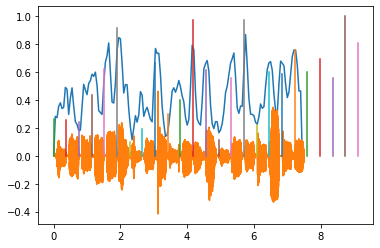

In [276]:
print(tension)
tt=[0]*len(tension)
for i in range(1,len(tension)-1):
    tt[i]=np.mean(tension[i-1:i+1])
plt.plot([i*0.05 for i in range(N)],tt)
t=wave_data[0:wave_step*N]
plt.plot([i/fs for i in range(wave_step*N)],t)
for i in range(25):
    plt.plot([i*0.38,i*0.38],[0,data_y[i,0]])

8.538391659694387
31.485861738652503
(127, 128)


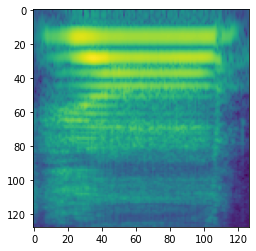

In [246]:
'''
mel_spect=engine.mel(matlab.double(t.tolist()))
mel_spect=np.transpose(mel_spect)
mel_spect=np.log(mel_spect)+40
print(np.min(mel_spect))
print(np.max(mel_spect))
print(np.shape(mel_spect))
plt.imshow(np.transpose(mel_spect))
'''

### test generated wav

44100
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)


d:\software\python36x64\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 1)
(1, 128, 128, 

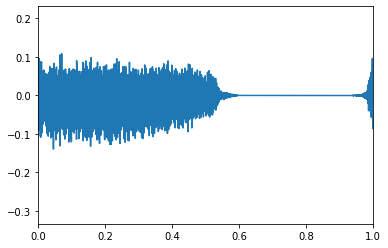

In [18]:
wave_data, fs = librosa.load("C:\\Users\\Lenovo\\Desktop\\autocover_test\\zhangli_min_0.wav", sr=None, mono=False)
plt.plot([i/fs for i in range(len(wave_data))],wave_data)
plt.xlim([0,1])

print(fs)
N=110
wave_bin=int(fs*0.402) #400ms window
wave_step=int(fs*0.05) #50ms step
tension=[]
breathiness=[]
voicing=[]
gender=[]
toneshift=[]
for i in range(N):
    t=wave_data[i*wave_step:i*wave_step+wave_bin]
    mel_spect=engine.mel(matlab.double(t.tolist()))
    mel_spect=np.transpose(mel_spect)
    mel_spect=np.log(mel_spect)+40
    
    x=np.expand_dims(mel_spect,0)
    x=np.expand_dims(x,3)
    print(np.shape(x))
    tt=backend.function([model.input],[model.output])(x)
    t_pred=np.squeeze(tt).tolist()
    
    tension.append(t_pred[0])
    breathiness.append(t_pred[1])
    voicing.append(t_pred[2])
    gender.append(t_pred[3])
    toneshift.append(t_pred[4])
    #plt.plot([j/fs for j in range(len(t))],t)
    
    

[0.24220389127731323, 0.2604885399341583, 0.257561057806015, 0.21031540632247925, 0.3107030987739563, 0.2755405306816101, 0.15151232481002808, 0.1620682179927826, 0.24918371438980103, 0.1725374460220337, 0.23179152607917786, 0.39540982246398926, 0.4767260253429413, 0.26134729385375977, 0.21789735555648804, 0.29022571444511414, 0.3617936968803406, 0.38974958658218384, 0.37047630548477173, 0.2474633753299713, 0.20745784044265747, 0.26680466532707214, 0.24869555234909058, 0.3420344591140747, 0.32027551531791687, 0.23420894145965576, 0.18116548657417297, 0.16851890087127686, 0.11291912198066711, 0.136342853307724, 0.3294040560722351, 0.43561339378356934, 0.5751978754997253, 0.3975619375705719, 0.22663840651512146, 0.3036864399909973, 0.3706088960170746, 0.47283729910850525, 0.42030033469200134, 0.3093070685863495, 0.3000066578388214, 0.29790136218070984, 0.3238096237182617, 0.3339771628379822, 0.3753204643726349, 0.2735758423805237, 0.19350558519363403, 0.14981141686439514, 0.1706683039665

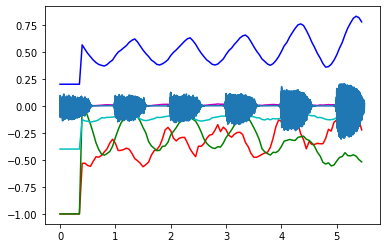

In [23]:
print(tension)
t1=[0]*len(tension)
t2=[0]*len(breathiness)
t3=[0]*len(voicing)
t4=[0]*len(gender)
t5=[0]*len(toneshift)
for i in range(8,len(tension)):
    t1[i]=np.mean(tension[i-8:i])
    t2[i]=np.mean(breathiness[i-8:i])
    t3[i]=np.mean(voicing[i-8:i])
    t4[i]=np.mean(gender[i-8:i])
    t5[i]=np.mean(toneshift[i-8:i])
    
range_param=[[-1,1],[-1,1],[0.2,1],[-0.1,0.1],[-400,400]]
plt.plot([i*0.05 for i in range(N)],np.array(t1)*2-1,'r')
plt.plot([i*0.05 for i in range(N)],np.array(t2)*2-1,'g')
plt.plot([i*0.05 for i in range(N)],np.array(t3)*0.8+0.2,'b')
plt.plot([i*0.05 for i in range(N)],np.array(t4)*0.2-0.1,'m')
plt.plot([i*0.05 for i in range(N)],np.array(t5)*0.8-0.4,'c')
t=wave_data[0:wave_step*N]
plt.plot([i/fs for i in range(wave_step*N)],t)

### test human voice

In [4]:
wave_data, fs = librosa.load("C:\\Users\\Lenovo\\Desktop\\autocover_test\\wings.wav", sr=None, mono=False)
wave_data=wave_data[0,:]
#plt.plot([i/fs for i in range(44100*2)],wave_data)
#plt.xlim([0,1])
print(wave_data.shape)

(4715957,)


In [5]:
mid = mido.MidiFile("C:\\Users\\Lenovo\\Desktop\\autocover_test\\wings.mid")
mid_onset=[0]
mid_offset=[0]
mid_pitch=[0]
t_time=0
tc=0
for i, track in enumerate(mid.tracks):#enumerate()：创建索引序列，索引初始为0
    print('Track {}: {}'.format(i, track.name))
    if i==1:
        for msg in track:#每个音轨的消息遍历
            t=msg.dict()
            t_time=t_time+t['time']
            if tc==0:
                mid_onset.append(t_time/480/3*tempo)
            if tc==2:
                mid_offset.append(t_time/480/3*tempo)
                mid_pitch.append(261.6*(2**((t['note']-60)/12)))
            #print(t)
            tc=(tc+1)%3
    else:
        msg=track[0]
        t=msg.dict()
        tempo=t['tempo']/1000000
mid_onset=mid_onset[:-1]
mid_onset.append(10000)
mid_offset.append(10000)
mid_pitch.append(0)
mid_onset=np.array(mid_onset)
mid_offset=np.array(mid_offset)
print(tempo)
print(len(mid_onset))
#print(mid_offset)
#print(mid_pitch)
print(tc)

Track 0: 
Track 1: 
0.416666
155
1


In [47]:
print(np.argmin(np.array([1,4,2,4,8,0])))

5


35.0 s
40.0 s
45.0 s
(1, 128)
175
(175, 1, 192)


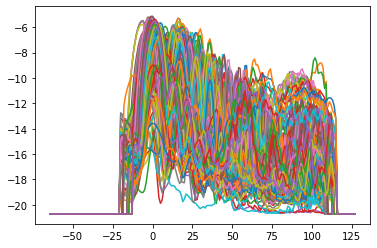

In [24]:
half_window=int(0.025*fs) #50ms window
step=int(0.05*fs) #50ms step

F_MEL=[37.0338217496571,54.4706311151463,72.3199620120444,90.5915739101210,109.295457169518,128.441838503175,148.041186568482,168.104217691226,188.641901724945,209.665468048916,231.186411708032,253.216499697945,275.767777398899,298.852575161777,322.483515049960,346.673517740688,371.435809589690,396.783929862954,422.731738139584,449.293421889796,476.483504232191,504.316851874556,532.808683242528,561.974576800560,591.830479569753,622.392715847205,653.677996131631,685.703426260158,718.486516761275,752.045192429058,786.397802123895,821.563128805091,857.560399800808,894.409297320991,932.129969218994,970.743040007813,1010.26962213694,1050.73132753602,1092.15027943156,1134.54912444327,1177.95104496655,1222.37977184786,1267.85959736008,1314.41538848478,1362.07260050869,1410.85729094191,1460.79613376534,1511.91643401521,1564.24614271264,1617.81387214642,1672.64891151728,1728.78124295243,1786.24155789876,1845.06127390409,1905.27255179526,1966.90831326269,2030.00225886102,2094.58888643547,2160.70350998424,2228.38227896714,2297.66219807100,2368.58114744270,2441.17790340090,2515.49215963769,2591.56454892198,2669.43666531619,2749.15108691862,2830.75139914391,2914.28221855415,2999.78921725388,3087.31914786222,3176.91986907576,3268.64037183623,3362.53080611728,3458.64250834491,3557.02802946670,3657.74116368508,3760.83697787029,3866.37184166935,3974.40345832720,4084.99089623710,4198.19462123742,4314.07652967254,4432.69998223585,4554.12983861345,4678.43249294748,4805.67591013835,4935.92966300596,5069.26497032992,5205.75473578984,5345.47358782683,5488.49792044809,5634.90593499675,5784.77768291005,5938.19510948900,6095.24209870356,6256.00451905784,6420.57027054040,6589.02933268525,6761.47381376995,6937.99800117758,7118.69841295021,7303.67385056205,7493.02545294102,7686.85675176853,7885.27372808732,8088.38487024879,8296.30123323102,8509.13649936029,8727.00704046913,8950.03198152484,9178.33326576343,9412.03572136443,9651.26712970317,9896.15829521768,10146.8431169286,10403.4586616512,10666.1452389391,10935.0464778013,11210.3094052344,11492.0845266122,11780.5259079776,12075.7912602810,12378.0420256122,12687.4434654717,13004.1647511306,13328.3790561288,13660.2636509604]
F_MEL=np.array(F_MEL)

mel_input=[]

N_count=0
i=int(35*fs)
#i=half_window
while i<45*fs: #wave_data.shape[0]-half_window:
    if (i/fs)%5<0.0001:
        print(i/fs,'s')
    
    clip=np.expand_dims(wave_data[i-half_window:i+half_window+1],1)
    mel_spect=engine.mel(matlab.double(clip.tolist()))
    mel_spect=np.array(mel_spect)
    
    t_mel=np.zeros(shape=(1,256-64))
    
    t1=np.where(mid_onset>i/fs)[0][0]
    t2=np.where(mid_offset<i/fs)[0][-1]
    if t1-t2==2:
        N_count=N_count+1
        mel_pitch=np.argmin(np.abs(F_MEL-mid_pitch[t1+1]))
        t_mel[0,128-mel_pitch-64:256-mel_pitch-64]=mel_spect
        t_mel=np.log(t_mel+1e-9)
        mel_input.append(t_mel)
        plt.plot([i for i in range(-128+64,128)],t_mel[0,:])
        #print(i/fs)
    i=i+step    
    #break

mel_input=np.array(mel_input)
print(i/fs,'s')
print(mel_spect.shape)
print(N_count)
print(mel_input.shape)

In [25]:
#model.summary()

param_time=[]
tension=[]
breathiness=[]
voicing=[]
gender=[]
toneshift=[]

t_pred=backend.function([model.input],[model.output])(mel_input)
t_pred=np.squeeze(t_pred)
print(t_pred)
      
    

[[0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.4862324  0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.48623234 0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0.48623234 0.52552044 0.48573506 0.4927323 ]
 [0.5450865  0

In [14]:
tension=[]
breathiness=[]
voicing=[]
gender=[]
toneshift=[]
for i in range(N):
    if (i*100/N)%2==0:
        print('%d'%(i/N*100)+'%')
        
    t=wave_data[i*wave_step:i*wave_step+wave_bin]
    #print(np.shape(t))
    mel_spect=engine.mel(matlab.double(t.tolist()))
    mel_spect=np.transpose(mel_spect)
    mel_spect=np.log(mel_spect+1e-20)+40
    
    x=np.expand_dims(mel_spect,0)
    x=np.expand_dims(x,3)
    #print(np.shape(x))
    tt=backend.function([model.input],[model.output])(x)
    t_pred=np.squeeze(tt).tolist()
    
    tension.append(t_pred[0])
    breathiness.append(t_pred[1])
    voicing.append(t_pred[2])
    gender.append(t_pred[3])
    toneshift.append(t_pred[4])
    #plt.plot([j/fs for j in range(len(t))],t)
    
    

44100
0%
2%
4%
6%
8%
10%
12%
14%
16%
18%
20%
22%
24%
26%
28%
30%
32%
34%
36%
38%
40%
42%
44%
46%
48%
50%
52%
54%
56%
57%
60%
62%
64%
66%
68%
70%
72%
74%
76%
78%
80%
82%
84%
86%
88%
90%
92%
94%
96%
98%


In [19]:
kernel=[0.1117,0.2364,0.3036,0.2365,0.1117]
print(np.dot(kernel,[1,1,1,1,1]))

t_tension=tension
t_breathiness=breathiness
t_voicing=voicing
t_gender=gender
t_tonshift=toneshift

for i in range(2,len(tension)-2):
    t=t_tension[i-2:i+3]
    t=np.dot(kernel,t)
    tension[i]=t
    
    t=t_breathiness[i-2:i+3]
    t=np.dot(kernel,t)
    breathiness[i]=t
    
    t=t_voicing[i-2:i+3]
    t=np.dot(kernel,t)
    voicing[i]=t
    
    t=t_gender[i-2:i+3]
    t=np.dot(kernel,t)
    gender[i]=t
    
    t=t_toneshift[i-2:i+3]
    t=np.dot(kernel,t)
    toneshift[i]=t


0.9998999999999999


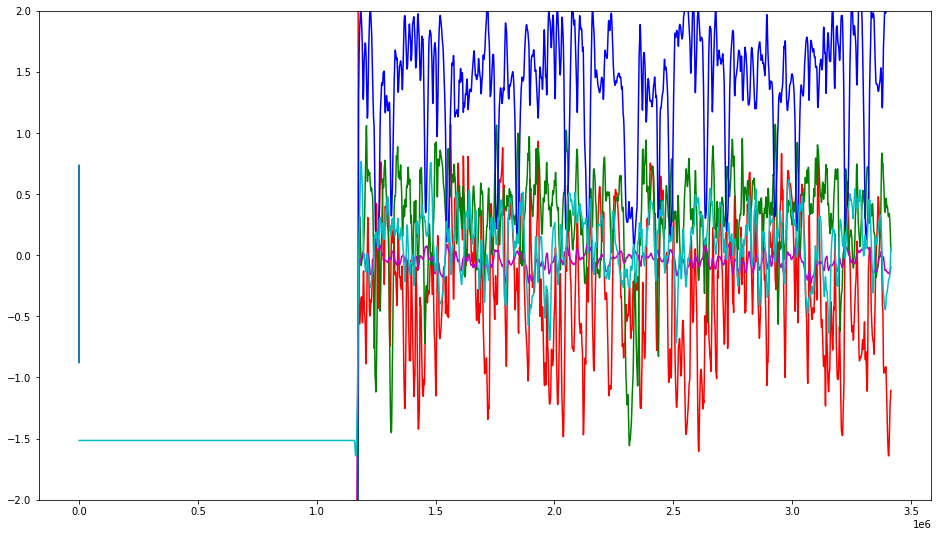

In [34]:
#print(tension)
t1=[0]*len(tension)
t2=[0]*len(breathiness)
t3=[0]*len(voicing)
t4=[0]*len(gender)
t5=[0]*len(toneshift)
for i in range(0,len(tension)):
    t1[i]=np.mean(tension[i])
    t2[i]=np.mean(breathiness[i])
    t3[i]=np.mean(voicing[i])
    t4[i]=np.mean(gender[i])
    t5[i]=np.mean(toneshift[i]) 
range_param=[[-1,1],[-1,1],[0.2,1],[-0.1,0.1],[-400,400]]
plt.figure(figsize=(16,9))
plt.plot([i*wave_step for i in range(N)],np.array(t1)*2-1,'r')
plt.plot([i*wave_step for i in range(N)],np.array(t2)*2-1,'g')
plt.plot([i*wave_step for i in range(N)],np.array(t3)*0.8+0.2,'b')
plt.plot([i*wave_step for i in range(N)],np.array(t4)*0.2-0.1,'m')
plt.plot([i*wave_step for i in range(N)],np.array(t5)*0.8-0.4,'c')
t=wave_data[0:wave_step*N]
plt.ylim([-2,2])
plt.plot([i/fs for i in range(0,wave_step*N)],t)

In [37]:
f=open("C:\\Users\\Lenovo\\Desktop\\autocover_test\\param.txt","w")
i=0
while i<len(tension):
    f.write(str.format('%.3f '%np.tan((t1[i]-0.5)/1.25)))
    f.write(str.format('%.3f '%(t2[i]*2-1)))
    f.write(str.format('%.3f '%(t3[i]/np.max(t3)*0.8+0.2)))
    
    f.write(str.format('%.3f '%(t4[i]*0.2-0.1)))
    f.write(str.format('%.3f '%(t5[i]*800-400)))
    f.write(str.format('%.3f\n'%(i*0.05)))
    i=i+4
f.close()

In [38]:
engine.quit()